In [21]:
# IMPORT 
import pandas as pd
import matplotlib.pyplot as plt
import platform
import re

# FILE
CPI='./Data_Aravis/소비자물가지수.csv'
CSI='./Data_Aravis/소비자동향조사.csv'
datalab='./Data_Aravis/datalab.xlsx'

# READ
cpiDF=pd.read_csv(CPI,encoding='CP949', skiprows=1)
csiDF=pd.read_csv(CSI,encoding='CP949',skiprows=1)
dlDF=pd.read_excel(datalab,skiprows=6)


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [22]:
# 플랫폼별 font 설정
if(platform.system() == 'Windows'):
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

### 물가 지수(CPI) & 소비자 심리 지수(CSI) :

In [23]:
cpiDF       # 물가지수

,시도별,2018.01,2018.02,2018.03,2018.04,2018.05,2018.06,2018.07,2018.08,2018.09,...,2021.03,2021.04,2021.05,2021.06,2021.07,2021.08,2021.09,2021.1,2021.11,2021.12
0,전국,98.106,98.855,98.751,98.931,98.979,98.779,98.59,99.462,100.221,...,101.84,101.98,102.05,102.05,102.26,102.75,103.17,103.35,103.87,104.04


In [24]:
# cpiDF 필요없는 컬럼 drop 
cpiDF.drop('시도별', axis=1, inplace=True)
cpiDF

,2018.01,2018.02,2018.03,2018.04,2018.05,2018.06,2018.07,2018.08,2018.09,2018.1,...,2021.03,2021.04,2021.05,2021.06,2021.07,2021.08,2021.09,2021.1,2021.11,2021.12
0,98.106,98.855,98.751,98.931,98.979,98.779,98.59,99.462,100.221,100.041,...,101.84,101.98,102.05,102.05,102.26,102.75,103.17,103.35,103.87,104.04


In [25]:
csiDF       # 소비자 심리 지수(CSI:Consumer Survey Index)   

,CSI코드별,CSI분류코드별,2018.01,2018.02,2018.03,2018.04,2018.05,2018.06,2018.07,2018.08,...,2021.03,2021.04,2021.05,2021.06,2021.07,2021.08,2021.09,2021.1,2021.11,2021.12
0,소비자심리지수,전체,111,109,109,108,109,106,102,100,...,100,102,105,110,103,102,104,107,108,104


In [26]:
# csiDF 필요없는 컬럼 drop 
csiDF.drop(['CSI코드별','CSI분류코드별'], axis=1, inplace=True)
csiDF

,2018.01,2018.02,2018.03,2018.04,2018.05,2018.06,2018.07,2018.08,2018.09,2018.1,...,2021.03,2021.04,2021.05,2021.06,2021.07,2021.08,2021.09,2021.1,2021.11,2021.12
0,111,109,109,108,109,106,102,100,101,100,...,100,102,105,110,103,102,104,107,108,104


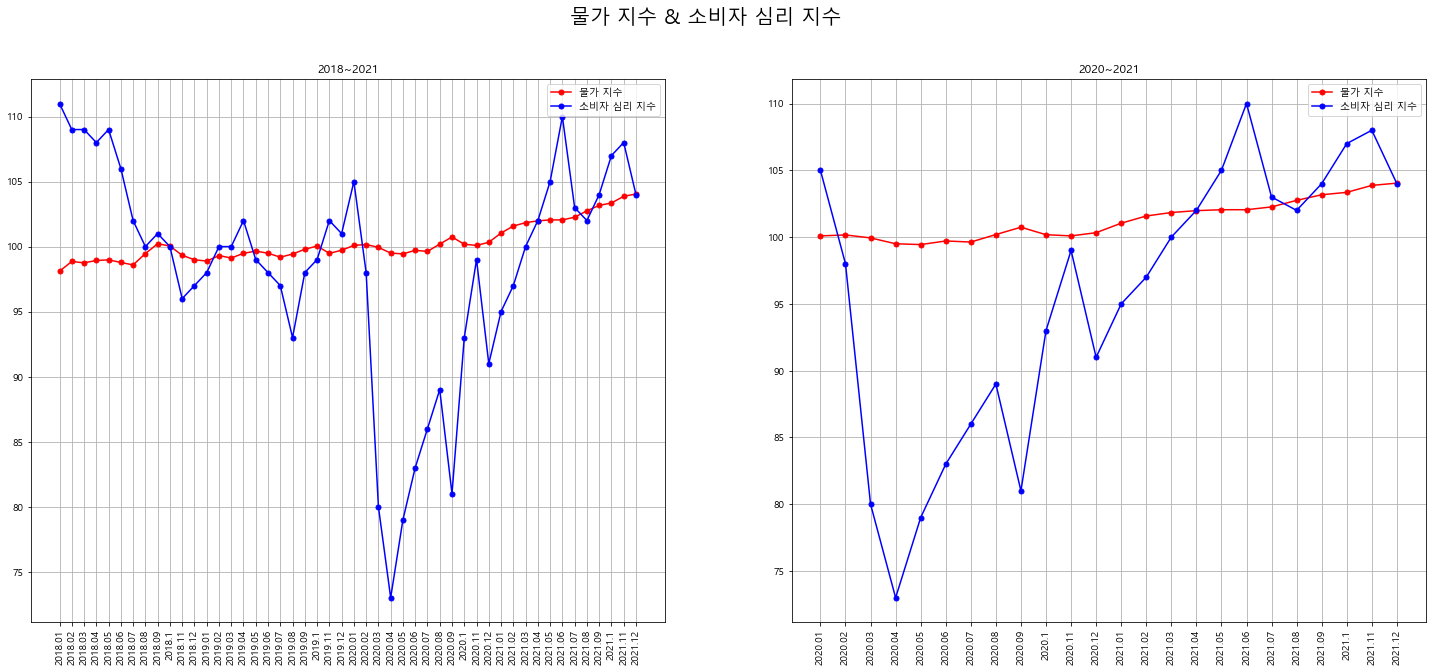

In [27]:
fig, axes=plt.subplots(1,2, figsize=(25,10))
plt.suptitle('물가 지수 & 소비자 심리 지수',fontsize=20)

plt.subplot(1,2,1)
plt.plot(cpiDF.columns, cpiDF.iloc[0], 'ro-', ms=5, label='물가 지수')
plt.plot(csiDF.columns, csiDF.iloc[0], 'bo-', ms=5, label='소비자 심리 지수')
plt.title('2018~2021')
plt.grid(True)
plt.xticks(rotation=90)

plt.legend()


plt.subplot(1,2,2)
plt.plot(cpiDF.columns[24:], cpiDF.iloc[0][24:], 'ro-', ms=5, label='물가 지수')
plt.plot(csiDF.columns[24:], csiDF.iloc[0][24:], 'bo-', ms=5, label='소비자 심리 지수')
plt.title('2020~2021')
plt.grid(True)
plt.xticks(rotation=90)
plt.legend()

plt.show()


# 이중 y축 ####

### 키워드 검색량 변화 :

In [28]:
dlDF.head()

,날짜,한샘,날짜.1,에이스침대,날짜.2,지누스,날짜.3,현대리바트,날짜.4,시디즈
0,2018-01-01,89.57066,2018-01-01,18.27978,2018-01-01,1.74346,2018-01-01,26.76321,2018-01-01,11.48323
1,2018-02-01,74.43347,2018-02-01,18.04732,2018-02-01,1.29021,2018-02-01,27.02813,2018-02-01,10.87090
2,2018-03-01,83.19747,2018-03-01,18.99230,2018-03-01,1.84570,2018-03-01,28.13874,2018-03-01,10.47641
3,2018-04-01,63.05081,2018-04-01,15.13552,2018-04-01,2.01453,2018-04-01,23.25063,2018-04-01,8.18323
4,2018-05-01,66.33914,2018-05-01,26.96745,2018-05-01,1.93730,2018-05-01,23.58483,2018-05-01,8.61043


In [29]:
# 불필요한 컬럼 drop
dlDF.drop(['날짜.1', '날짜.2', '날짜.3', '날짜.4'], axis=1, inplace=True)
dlDF.head(2)

,날짜,한샘,에이스침대,지누스,현대리바트,시디즈
0,2018-01-01,89.57066,18.27978,1.74346,26.76321,11.48323
1,2018-02-01,74.43347,18.04732,1.29021,27.02813,10.87090


In [30]:
# 날짜 컬럼 인덱스 설정
dlDF.set_index('날짜', inplace=True)
dlDF.head(2)

,한샘,에이스침대,지누스,현대리바트,시디즈
날짜,,,,,
2018-01-01,89.57066,18.27978,1.74346,26.76321,11.48323
2018-02-01,74.43347,18.04732,1.29021,27.02813,10.87090


In [31]:
# 데이터 정규화
dlDF_nor=pd.DataFrame()
for c in dlDF.columns:
    if not '_nor' in c:
        numerator=dlDF[c]-dlDF[c].mean()
        denominator=dlDF[c].std()
        dlDF_nor[str(c)+'_nor']=numerator/denominator

dlDF_nor.head(3)

,한샘_nor,에이스침대_nor,지누스_nor,현대리바트_nor,시디즈_nor
날짜,,,,,
2018-01-01,1.537224,-0.777765,-1.242948,-0.100432,-0.056506
2018-02-01,0.491738,-0.829061,-1.337766,-0.054303,-0.244830
2018-03-01,1.097044,-0.620534,-1.221559,0.139083,-0.366157


In [32]:
dlDF_nor.columns

Index(['한샘_nor', '에이스침대_nor', '지누스_nor', '현대리바트_nor', '시디즈_nor'], dtype='object')

c:\ProgramData\Anaconda3\envs\EV_PY39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


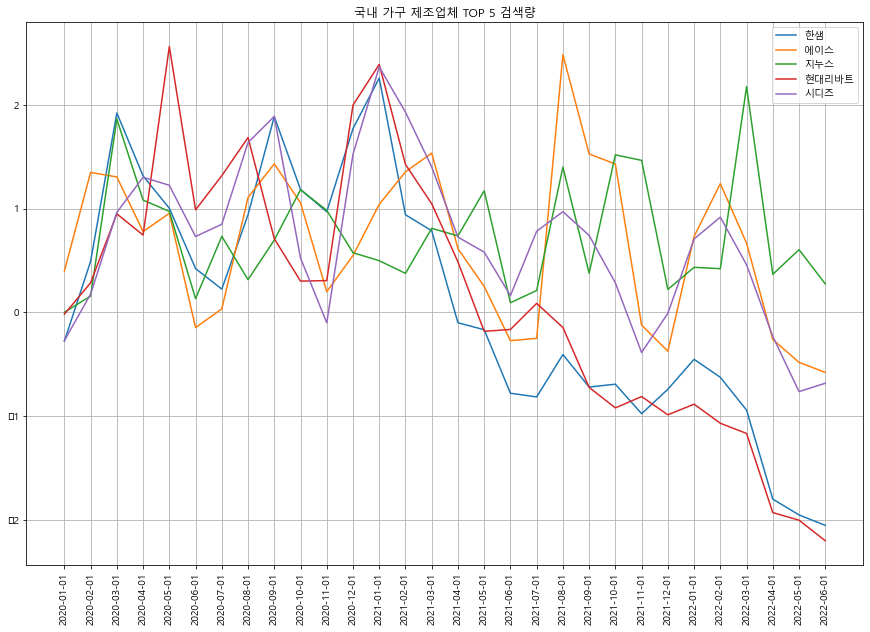

In [33]:
plt.figure(figsize=(15,10))

plt.title('국내 가구 제조업체 TOP 5 검색량')

line1=plt.plot(dlDF_nor.index[24:], dlDF_nor['한샘_nor'][24:],ms=5,label='한샘')
line2=plt.plot(dlDF_nor.index[24:], dlDF_nor['에이스침대_nor'][24:],ms=5,label='에이스')
line3=plt.plot(dlDF_nor.index[24:], dlDF_nor['지누스_nor'][24:],ms=5,label='지누스')
line4=plt.plot(dlDF_nor.index[24:], dlDF_nor['현대리바트_nor'][24:],ms=5,label='현대리바트')
line5=plt.plot(dlDF_nor.index[24:], dlDF_nor['시디즈_nor'][24:],ms=5,label='시디즈')

plt.xticks(rotation=90)
plt.grid(True)


lines=line1+line2+line3+line4+line5
labels=[l.get_label() for l in lines]
plt.legend(lines, labels, loc='upper right')

In [34]:
### 보조선 추가?